# 파이널 프로젝트 Overview
* 마지막 문제풀이입니다! 데이터리안 블로그 GA 데이터를 분석하면서 이번 강의에서 배운 판다스의 다양한 기능들을 사용해봅시다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 pandas 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd

In [ ]:
ga = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/ga_encrypted.csv')

# 데이터 설명

이 데이터는 [데이터리안의 테크 블로그](https://datarian-kr.github.io/) GA(Google Anlaytics) 데이터의 일부입니다. 데이터리안은 GA를 이용해 테크 블로그 안에서 사용자들이 어떤 페이지를 보는지, 어떤 요소를 클릭하는지 등 사용자 로그를 분석합니다.

데이터리안 블로그의 'Blog' 탭에 들어가면 멤버들이 쓴 글을 보실 수 있습니다. 이 글을 소비하는 사용자들의 패턴을 분석하여 앞으로 데이터리안이 어떤 글을 더 써야할지, 어떤 글을 사용자들이 흥미롭게 생각했는지 등을 파악해보려고 합니다.

<div>
<img src="https://github.com/datarian-kr/pandas/blob/main/img/blog_main.png?raw=true" width="500"/>
</div>

**컬럼 상세**
* event_date_kst: 이벤트가 일어난 날짜 (KST)
* user_pseudo_id: 암호화 된 사용자 아이디
* event_timestamp_kst: 이벤트가 일어난 시각 (KST)
* user_first_touch_timestamp_kst: 사용자가 처음 사이트를 방문한 시각 (KST)
* event_name: 이벤트 이름
* key: 이벤트 매개변수의 키
* string_value: 이벤트 매개변수의 문자열 값
* int_value: 이벤트 매개변수의 정수 값
* geo_continent: 이벤트가 발생한 대륙
* geo_country: 이벤트가 발생한 국가
* traffic_source_medium: 사용자를 최초로 획득한 매체
* traffic_source: 사용자를 최초로 획득한 네트워크의 이름

**참고**  
위 데이터는 BigQuery로 내보낸 GA4의 속성 데이터입니다. 데이터의 형식 및 스키마에 대한 더 자세한 설명은 `BigQuery Export 스키마` 문서를 참고하세요. 각 이벤트가 수집되는 기준은 `[GA4] 자동으로 수집되는 이벤트` 문서에서 찾아보실 수 있습니다.
* [BigQuery Export 스키마](https://support.google.com/analytics/answer/7029846?hl=ko)
* [[GA4] 자동으로 수집되는 이벤트](https://support.google.com/analytics/answer/9234069)

# Q1. 탐색적 데이터 분석

데이터를 탐색해봅시다.

**아래의 간단한 질문들에 답하며 EDA를 시작해도 좋습니다.**
<br><br>
🇶 총 몇 개의 데이터가 들어있나요?
<br>
🇦 12,457개
<br>
<br>
🇶 몇 일치의 데이터가 들어있나요?
<br>
🇦 13일
<br>
🇦 2021-07-29 부터 2021-08-10 까지
<br>
<br>
🇶 `event_name`, `key`, `geo_continent` 등 컬럼에는 각각 어떤 데이터들이 들어있나요?
<br>
🇦 event_name:  ['first_visit' 'session_start' 'page_view' 'scroll' 'user_engagement'
 'click']
<br>
🇦 key:  ['page_location' 'session_engaged' 'page_title' 'engaged_session_event'
 'ga_session_id' 'ga_session_number' 'entrances' 'engagement_time_msec'
 'percent_scrolled' 'ignore_referrer' 'page_referrer' 'medium' 'term'
 'source' 'campaign' 'outbound' 'link_url' 'link_domain' 'link_classes']
<br>
🇦 geo_continent:  ['Asia' 'Americas']
<br>
<br>
🇶 일자 별로 몇 명의 유저가 방문했나요?
<br>
🇦
<br>
<br>
🇶 블로그 글을 조회하거나, 읽은 것과 관련한 로그는 어떤 조건으로 찾을 수 있나요? (중요!)
<br>
🇦
<br>
<br>

In [ ]:
# 데이터 인포
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   event_date_kst                  12457 non-null  object 
 1   user_pseudo_id                  12457 non-null  object 
 2   event_timestamp_kst             12457 non-null  object 
 3   user_first_touch_timestamp_kst  12457 non-null  object 
 4   event_name                      12457 non-null  object 
 5   key                             12457 non-null  object 
 6   string_value                    7050 non-null   object 
 7   int_value                       5407 non-null   float64
 8   geo_continent                   12457 non-null  object 
 9   geo_country                     12457 non-null  object 
 10  traffic_source_medium           12457 non-null  object 
 11  traffic_source                  12457 non-null  object 
dtypes: float64(1), object(11)
memory

In [ ]:
# 데이터셋 전체기간
dates = ga['event_date_kst'].unique()
print(len(dates))

dates.sort()
print(dates)

13
['2021-07-29' '2021-07-30' '2021-07-31' '2021-08-01' '2021-08-02'
 '2021-08-03' '2021-08-04' '2021-08-05' '2021-08-06' '2021-08-07'
 '2021-08-08' '2021-08-09' '2021-08-10']


In [ ]:
# 변수(values) 확인하기  ['event_name', 'key', 'geo_continent']
print('event_name: ', ga['event_name'].unique())
print('key: ', ga['key'].unique())
print('geo_continent: ', ga['geo_continent'].unique())

event_name:  ['first_visit' 'session_start' 'page_view' 'scroll' 'user_engagement'
 'click']
key:  ['page_location' 'session_engaged' 'page_title' 'engaged_session_event'
 'ga_session_id' 'ga_session_number' 'entrances' 'engagement_time_msec'
 'percent_scrolled' 'ignore_referrer' 'page_referrer' 'medium' 'term'
 'source' 'campaign' 'outbound' 'link_url' 'link_domain' 'link_classes']
geo_continent:  ['Asia' 'Americas']


# Q2. 블로그 글과 관련한 로그 필터링

전체 데이터 중 분석에 필요한 로그만 필터링합니다. 아래 조건을 충족하는 데이터를 선택해서 `pages` 데이터 프레임에 저장해주세요.

**조건**
1. `event_name`이 `page_view`, `scroll`, `user_engagement` 중에 하나일 것
2. 해당 이벤트의 파라미터(`key` 컬럼) 중 `page_title` 만 선택

**[참고] 이벤트 정의**

상단에 `[GA4] 자동으로 수집되는 이벤트` 문서에서 더 자세한 내용을 보실 수 있습니다.
* page_view: 페이지가 로드될 때
* scroll: 사용자가 각 페이지에서 처음으로 하단에 도달할 때(세로 기준으로 페이지의 90% 이상이 표시될 때)
* user_engagement: 1초 이상 웹페이지에 머물렀을 때

In [ ]:
# event_name 종류
ga['event_name'].unique()

array(['first_visit', 'session_start', 'page_view', 'scroll',
       'user_engagement', 'click'], dtype=object)

In [ ]:
# 특정 이벤트 필터링
events = ga['event_name'].isin(['page_view', 'scroll', 'user_engagement']) # 조건 1
title = ga['key'] == 'page_title' # 조건 2

pages = ga[events & title]
pages.sample(3)

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source
6346,2021-08-04,a9537c09ca0c4534010910dfb1d9577c058f1a76,2021-08-04 23:19:41,2021-08-04 23:19:06,user_engagement,page_title,데이터 분석을 위한 SQL 참고도서 추천,NaN,Asia,South Korea,organic,google
11079,2021-07-29,d7fdcb88113a4f9bc6b8e74173d7dc2452ac78c0,2021-07-29 23:21:04,2021-07-29 23:20:45,user_engagement,page_title,Datarian,NaN,Asia,South Korea,(none),(direct)
10690,2021-08-09,334001156070221f967bedfc1d717495f6cb0c96,2021-08-09 12:54:20,2020-05-30 13:13:46,user_engagement,page_title,인프런 지식 공유자는 이런 데이터가 궁금해요!,NaN,Asia,South Korea,referral,tagassistant.google.com


# Q3. 사람들이 가장 많이 본 페이지는 무엇일까요?

사람들이 가장 많이 본 페이지가 뭔지 알아보고 데이터리안이 앞으로 블로그에 어떤 글을 더 써야할지 생각해봅시다. 아래 스텝에 따라 진행해주세요.

* Step 1. `pages` 데이터 프레임에서 '페이지 조회' 이벤트만 필터링하여 `page_view` 데이터 프레임을 만들어주세요.
* Step 2. `page_view` 을 가지고 데이터 기간 동안 어떤 페이지가 몇 번 조회되었는지, 몇 명이 조회하였는지 계산하고 이를 `page_view_cnt` 데이터 프레임에 저장해주세요.

  - Step 2 Output 예시

| string_value                                |   count |   nunique |
|:--------------------------------------------|--------:|----------:|
| 2020 현업 분석가 3인 선데이 아점 토크 _ 1화 |       3 |         3 |
| 2020 현업 분석가 3인 선데이 아점 토크 _ 2화 |       1 |         1 |
| Blog                                        |      94 |        47 |

* Step 3. 위 데이터를 페이지가 많이 조회 된 순서대로 정렬해주세요.

### 질문
🇶 가장 많이 조회된 페이지는 어디이고, 데이터 기간 동안 몇 번 조회되었나요?
<br>
🇦 Datarian 페이지가 가장 많이 조회되었고 이는 블로그의 메인 탭입니다. 데이터 기간 동안 117회 조회되었습니다.
<br>
<br>
🇶 데이터리안 블로그의 구조에서 '탭'에 속하는 'Datarian', 'Blog', 'Member'를 제외한 페이지들은 블로그 글입니다. 어떤 글이 가장 많이 읽혔나요? 데이터 기간 동안 몇 번 조회되었나요?
<br>
🇦 '데이터 분석을 위한 SQL 참고도서 추천'이라는 글이 86회로 가장 많이 조회되었습니다.
<br>
<br>

In [ ]:
# Step 1.
page_view = pages[pages['event_name'] == 'page_view']
page_view.sample(3)

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source
11825,2021-08-10,5999a81572593491f80f319adc64ebfa0c362ec5,2021-08-10 13:50:52,2021-08-10 13:50:18,page_view,page_title,Blog,NaN,Asia,South Korea,(none),(direct)
7483,2021-07-30,72e080f5609e3dd226c9eceb859435fb673a3c9f,2021-07-30 17:28:47,2021-07-30 17:27:54,page_view,page_title,Datarian,NaN,Asia,South Korea,(none),(direct)
6523,2021-08-04,71fbee5731627ae9a2fdd0a29c64e39287cec0c6,2021-08-04 17:15:32,2021-08-04 17:14:45,page_view,page_title,Members,NaN,Asia,South Korea,organic,google


In [ ]:
# Step 2.
page_view_cnt = page_view.groupby(['string_value'])['user_pseudo_id'].agg(['count', 'nunique'])
page_view_cnt.sample(3)

,count,nunique
string_value,,
Datarian,117,63
인프런 지식 공유자는 이런 데이터가 궁금해요!,3,3
Grid Search vs Random Search,1,1


In [ ]:
# Step 3.
page_view_cnt.sort_values('count', ascending=False)

,count,nunique
string_value,,
Datarian,117,63
Blog,94,47
Members,88,32
데이터 분석을 위한 SQL 참고도서 추천,86,71
내가 만약 카톡 선물하기의 분석가라면,34,26
"직방, 다방, 네이버 부동산, 집토스 뭐가 다를까? (부제: 프롭테크 산업이란?)",14,10
한국 기후위기 데이터로 글쓰고 100만원 받기,8,7
[백문이불여일타] SQL 시리즈 강의 가이드,5,4
2020 현업 분석가 3인 선데이 아점 토크 _ 1화,3,3


# Q4. 사람들이 가장 많이 읽은 페이지는 무엇일까요?

위에서 살펴본 pageview 로그는 단순히 그 '페이지를 조회했다'를 의미합니다. 그러면 사람들이 글을 실제로 읽었는지 확인해보려면 어떤 방법들이 있을 수 있을까요?

그 페이지에 얼마나 머물렀는지, 스크롤을 얼마나 내렸는지, 글 안의 링크들을 클릭해 보았는지 등으로 사람들이 그 컨텐츠를 실제로 소비했는지를 가늠해 볼 수 있을겁니다. 이번 문제에서는 `page_view`와 함께 `user_engagement`, `scroll` 로그를 함께 분석해봅시다.

**아래 스텝에 따라서 진행해주세요.**

* Step 1. `pages` 데이터 프레임을 활용하여 페이지 별 조회수, 스크롤 90% 이상 히트 횟수(`scroll`), 페이지에서 1초 이상 머무른 횟수(`user_engagement`)를 집계해주세요. 집계 결과는 `pages_pivot` 변수에 저장하세요.

  - Step 1 Output 예시

| string_value                                |   page_view |   scroll |   user_engagement |
|:--------------------------------------------|------------:|---------:|------------------:|
| 2020 현업 분석가 3인 선데이 아점 토크 _ 1화 |           3 |        1 |                 3 |
| 2020 현업 분석가 3인 선데이 아점 토크 _ 2화 |           1 |        0 |                 1 |
| Blog                                        |          94 |       22 |                82 |

<br>

* Step 2. 데이터 해석의 편의를 위해 `pages_pivot` 데이터 프레임을 페이지 조회수가 많은 기준으로 정렬하여 `pages_pivot` 데이터 프레임에 다시 저장합니다.

<br>

* Step 3. 블로그 글에 노출된 사람들 중 그 글을 실제로 읽은 사람이 얼마나 되는지, 다 읽은 사람이 얼마나 되는지 비율을 계산하고 싶습니다. `page_view`, `scroll`, `user_engagement` 컬럼을 이용하여 비율을 계산하고 `scroll %`, `user engagement %` 컬럼을 추가하세요.

  - Step 3 Output 예시

| string_value   |   page_view |   scroll |   user_engagement |   scroll % |   user engagement % |
|:---------------|------------:|---------:|------------------:|-----------:|--------------------:|
| Datarian       |         117 |       68 |                97 |    58.1197 |             82.906  |
| Blog           |          94 |       22 |                82 |    23.4043 |             87.234  |
| Members        |          88 |       26 |                64 |    29.5455 |             72.7273 |

### 질문

🇶 페이지에서 1초 이상 머물 경우 `user_engagement` 로그가 기록됩니다. `page_view` 로그는 있으나 `user_engagement` 로그가 없는 경우를 어떻게 해석할 수 있을까요?
<br>
🇦 이는 이 페이지에 방문한 사람의 약 33%의 사람들이 페이지에서 1초 이상 머무르지 않고 떠났음을 의미합니다. 제목을 보고 클릭해서 들어왔는데 글의 앞부분이 기대와 달랐거나, 흥미를 끌지 못해 이탈한 것으로 해석할 수 있습니다.
<br>
<br>
🇶 '데이터 분석을 위한 SQL 참고도서 추천'의 `user engagement` 비율은 얼마이며, 이를 어떻게 개선할 수 있을까요?
<br>
🇦 '데이터 분석을 위한 SQL 참고도서 추천' 글의 `user engagement %` 는 약 67% 이며, 첫 단락에서 사람들을 집중시킬 수 있는 장치를 넣는 등 전체 글 중에서도 초반부를 개선하는 것이 지표 개선과 연관이 있을 것입니다.
<br>
<br>
🇶 페이지의 하단 90% 까지 내렸을 때 `scroll` 로그가 기록됩니다. 이 로그를 보고 글의 완독률을 대략 파악할 수 있겠지요! '데이터 분석을 위한 SQL 참고도서 추천' 글의 완독률은 어느정도 인가요?
<br>
🇦 '데이터 분석을 위한 SQL 참고도서 추천' 글의 완독률은 약 58% 입니다. `user engagement %` 가 67% 인 것을 생각해보면 일단 글을 읽기 시작한 독자들의 약 85%(58%/67%)가 끝까지 글을 읽는다고 볼 수 있습니다.
<br>
<br>
🇶 다른 글과 비교해 높은 편인가요 낮은 편인가요?
<br>
🇦 완독률은 다른 인기글 '내가 만약 카톡 선물하기의 분석가라면'(약 53%), '프롭 테크 산업이란?'(약 57%)과 비교해 비슷한 수준입니다.

In [ ]:
# Step 1.
pages_pivot = pages.pivot_table(index='string_value', columns='event_name', values='user_pseudo_id', aggfunc='count', fill_value=0)   # fill_value=0 는 결측치를 '0'으로 처리

In [ ]:
# Step 2.
pages_pivot = pages_pivot.sort_values('page_view', ascending=False)

In [ ]:
# Step 3.
pages_pivot['scroll %'] = (pages_pivot['scroll'] * 100.0 / pages_pivot['page_view']).round(1)
pages_pivot['user engagement %'] = (pages_pivot['user_engagement'] * 100.0 / pages_pivot['page_view']).round(1)
pages_pivot

event_name,page_view,scroll,user_engagement,scroll %,user engagement %
string_value,,,,,
Datarian,117,68,97,58.1,82.9
Blog,94,22,82,23.4,87.2
Members,88,26,64,29.5,72.7
데이터 분석을 위한 SQL 참고도서 추천,86,50,58,58.1,67.4
내가 만약 카톡 선물하기의 분석가라면,34,18,21,52.9,61.8
"직방, 다방, 네이버 부동산, 집토스 뭐가 다를까? (부제: 프롭테크 산업이란?)",14,8,8,57.1,57.1
한국 기후위기 데이터로 글쓰고 100만원 받기,8,6,4,75.0,50.0
[백문이불여일타] SQL 시리즈 강의 가이드,5,1,4,20.0,80.0
2020 현업 분석가 3인 선데이 아점 토크 _ 1화,3,1,3,33.3,100.0


# Q5. 사용자 스크롤 패턴 분석
가장 많이 읽힌 페이지만이 아니라, 사용자들이 페이지를 어떻게 스크롤하고 있는지에 대한 분석을 통해 사용자 행동을 더 자세히 이해할 수 있습니다. 이를 통해 사용자들이 어디까지 읽고 머무르는지, 어떤 부분이 가장 관심을 끄는지 등을 파악할 수 있습니다.

- Step 1. 'scroll_event' 이벤트를 추출하고, 각 사용자 별로 페이지 스크롤 횟수를 계산합니다.
- Step 2. 이 정보를 기존 데이터셋과 합쳐서 히스토그램으로 스크롤 횟수의 분포를 시각화합니다.


In [ ]:
# Step 1.

# 페이지 스크롤 이벤트 추출
scroll_events = ga[ga['event_name'] == 'scroll']

# 사용자 별로 페이지 스크롤 횟수 계산
scroll_counts = scroll_events.groupby('user_pseudo_id')['event_name'].count().sort_values(ascending=False).reset_index()
scroll_counts.columns = ['user_pseudo_id', 'scroll_count']
scroll_counts.head(5)

,user_pseudo_id,scroll_count
0,afc1a16703c6f3c3b040b12f849ecc652afcc2a1,99
1,a3c5e910cdeeb9c66c02b770a9e2b2bdc6faaf84,98
2,334001156070221f967bedfc1d717495f6cb0c96,91
3,00dd6e285a7281169a512b68a8bbe4dfa554c73e,68
4,0ad99206475f7e24b6e46d54ed4541eea94d5719,64


In [ ]:
# 사용자별로 페이지 스크롤 횟수와 함께 다른 정보도 얻기 위해 merge
merged_ga = pd.merge(ga, scroll_counts, on='user_pseudo_id', how='left')
merged_ga.sort_values('scroll_count', ascending=False)

,event_date_kst,user_pseudo_id,event_timestamp_kst,user_first_touch_timestamp_kst,event_name,key,string_value,int_value,geo_continent,geo_country,traffic_source_medium,traffic_source,scroll_count
3236,2021-08-08,afc1a16703c6f3c3b040b12f849ecc652afcc2a1,2021-08-08 23:45:31,2021-08-07 21:17:04,page_view,ga_session_number,NaN,3.0,Asia,South Korea,(none),(direct),99.0
3225,2021-08-08,afc1a16703c6f3c3b040b12f849ecc652afcc2a1,2021-08-08 23:45:25,2021-08-07 21:17:04,scroll,ignore_referrer,true,NaN,Asia,South Korea,(none),(direct),99.0
3234,2021-08-08,afc1a16703c6f3c3b040b12f849ecc652afcc2a1,2021-08-08 23:45:25,2021-08-07 21:17:04,user_engagement,page_location,https://datarian-kr.github.io/blog/product-stu...,NaN,Asia,South Korea,(none),(direct),99.0
3233,2021-08-08,afc1a16703c6f3c3b040b12f849ecc652afcc2a1,2021-08-08 23:45:25,2021-08-07 21:17:04,user_engagement,session_engaged,1,NaN,Asia,South Korea,(none),(direct),99.0
3232,2021-08-08,afc1a16703c6f3c3b040b12f849ecc652afcc2a1,2021-08-08 23:45:25,2021-08-07 21:17:04,user_engagement,engaged_session_event,NaN,1.0,Asia,South Korea,(none),(direct),99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,2021-08-10,ef9eb5753c4c556f95148152f327e5fa37929efc,2021-08-10 20:13:31,2021-08-10 20:13:29,user_engagement,engagement_time_msec,NaN,1537.0,Asia,South Korea,referral,channeltab-godfather.onkakao.net,NaN
12453,2021-08-10,ef9eb5753c4c556f95148152f327e5fa37929efc,2021-08-10 20:13:31,2021-08-10 20:13:29,user_engagement,page_location,https://datarian-kr.github.io/blog/book-sql/,NaN,Asia,South Korea,referral,channeltab-godfather.onkakao.net,NaN
12454,2021-08-10,ef9eb5753c4c556f95148152f327e5fa37929efc,2021-08-10 20:13:31,2021-08-10 20:13:29,user_engagement,ga_session_number,NaN,1.0,Asia,South Korea,referral,channeltab-godfather.onkakao.net,NaN
12455,2021-08-10,ef9eb5753c4c556f95148152f327e5fa37929efc,2021-08-10 20:13:31,2021-08-10 20:13:29,user_engagement,page_title,데이터 분석을 위한 SQL 참고도서 추천,NaN,Asia,South Korea,referral,channeltab-godfather.onkakao.net,NaN


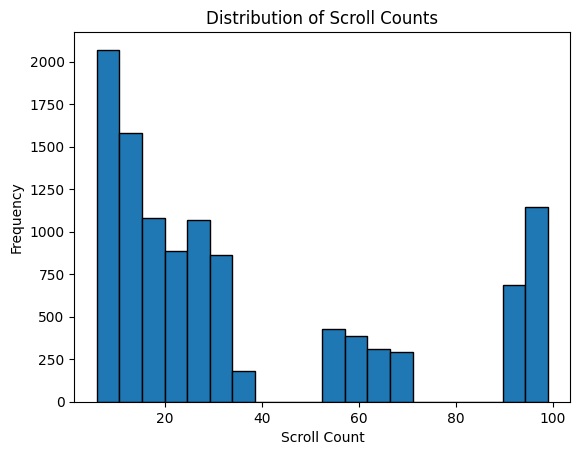

In [ ]:
# Step 2.

import matplotlib.pyplot as plt

# 히스토그램으로 스크롤 횟수 분포 확인
plt.hist(merged_ga['scroll_count'], bins=20, edgecolor='black')
plt.title('Distribution of Scroll Counts')
plt.xlabel('Scroll Count')
plt.ylabel('Frequency')
plt.show()

---
데이터리안에서 제공하는 데이터셋과 문제풀이를 활용하였습니다.
<br>
`#데이터리안` `#판다스공부` `#TIL`